
---

# Vinicius Guerra e Ribas -  Data Engineer
[Energy Engineer (UnB)](https://www.unb.br/) │ [Data Scientist and Analytics (USP)](https://www5.usp.br/)


## [📧 E-mail](mailto:viniciusgribas@gmail.com) │ [🎯 Linkedin](https://www.linkedin.com/in/vinicius-guerra-e-ribas/) │ [😸 GitHub](https://github.com/viniciusgribas) 

---

# [💻Project Notebook](https://github.com/viniciusgribas/EnergyNewsScrapping) [🇧🇷] 


In [1]:
# import the libraries
#
## WebScrapping Libraries
from bs4 import BeautifulSoup
import requests
import urllib.request

## NLP and ML Libraries
import nltk
from newspaper import Article
nltk.download('floresta') # "Portuguese Treebank" divides the text into a list of sentences using ML algorithm
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Data Frame manipulation and Analytics Libraries
import pandas as pd
import time
import matplotlib.pyplot as py
import plotly_express as px
import plotly as plt
import datetime



[nltk_data] Downloading package floresta to
[nltk_data]     C:\Users\vinic\AppData\Roaming\nltk_data...
[nltk_data]   Package floresta is already up-to-date!


In [2]:
# Create a function to scrape the website

def scrape_cnn_website(search, page):
# """ 
# Scrapes the CNN Website based on a theme and a page number.
# """

    page_theme = search
    page_number = str(page)

    url = 'https://www.cnnbrasil.com.br/tudo-sobre/' + page_theme + '/' + 'pagina' + page_number +'/' 
    webpage = requests.get(url)
    soup = BeautifulSoup(webpage.text, 'html.parser')

    # Get the location of the information
    article_date = soup.find_all('span', attrs= {'class': 'home__title__date'}) # location of data information
    article_title = soup.find_all('h2', attrs= {'class': 'news-item-header__title'} ) # location of title information
    article_tag = soup.find_all('span', attrs= {'class': 'latest__news__category'} ) # location of the tag
    article_theme = soup.find_all('h1', attrs= {'class': 'tags__topics__title'} ) # location of the theme
    article_links = soup.find_all('a',attrs={'class': 'home__list__tag'} )# location of the links

    # Loop through the article_date
    for i in article_date:
        temp=0
        temp = i.text.strip()
        date = temp[0:10]
        time = temp[14:19]
        date_time = date +'-'+ time

        date_time = pd.to_datetime(date_time,format= '%d/%m/%Y-%H:%M').strftime('%d/%m/%Y - %H:%M')
        dates.append(date_time)

    # Loop through the article_titles and set the theme
    for i in article_title:
        temp = 0
        temp = i.text.strip()
        title.append(temp)
        theme.append(article_theme[0].text.strip().split()[2])

    # Loop through the article_tags
    for i in article_tag:
        temp = 0
        temp = i.text.strip()
        tag.append(temp)

    # Loop through the article_links
    for i in article_links:
        href = i.get('href')
        links.append(href)

        # NLP Process: Scrapes the article, download the information and parse a nlp into a interable object
        article = Article(href) # Scrapes the Article
        article.download()
        article.parse()
        article.nlp()

        # Interact with the articles
        site_name = article.meta_data['og']['site_name']
        text = article.text
        summary = article.summary
        texts.append(text)
        summarys.append(summary)
        authors.append(site_name)


In [3]:
# Create lists to store the scraped data
theme = []
tag = []
title = []
authors = []
dates = []
links = []
texts = []
summarys = []

# Number of pages to scrap
## min = 1
n = 1

# search theme
## use '-' for spacing
## samples: 'energia' ; 'energia-renovavel' ; 'energias-renováveis-no-brasil'
search_theme = 'energia'


# performs the scrapping with the chosen search on the given pages
for i in range(1 , n+1):

    #applies the function
    scrape_cnn_website(search_theme, i )

    # checks how many lines are created for each page
    print(i,        # page
    len(authors),  
    len(links), 
    len(theme), 
    len(tag), 
    len(title),
    len(dates), 
    len(texts), 
    len(summarys) 
)

1 30 30 30 30 30 30 30 30


In [4]:
# creates a dataframe based on the stored lists
df = pd.DataFrame( columns= ['dates','theme','authors','tag','title','summarys','texts','links' ] )
df.dates = dates
df.dates = pd.to_datetime(df.dates,format= '%d/%m/%Y - %H:%M')
df.theme = theme
df.authors = authors
df.tag = tag
df.title = title
df.summarys = summarys
df.texts = texts
df.links = links

# check the analyzed dates
date_min = str(df.dates.dt.date.min().strftime('%d/%m/%Y'))+' at '+ str(df.dates.dt.time.min())
date_max = str(df.dates.dt.date.max().strftime('%d/%m/%Y'))+' at '+ str(df.dates.dt.time.max())
df_date_range = 'DF Date Rage: from ['+ date_min + '] to [' + date_max + ']'
print(df_date_range)

# checks if the dataframe has null values
df.isnull().sum()

DF Date Rage: from [20/05/2022 at 00:03:00] to [15/06/2022 at 23:02:00]


dates       0
theme       0
authors     0
tag         0
title       0
summarys    0
texts       0
links       0
dtype: int64

In [5]:
# filter by date
df_filtered = df[df.dates > '2022-01-01']

# check the analyzed dates
date_min = str(df_filtered.dates.dt.date.min().strftime('%d/%m/%Y'))+' at '+ str(df_filtered.dates.dt.time.min())
date_max = str(df_filtered.dates.dt.date.max().strftime('%d/%m/%Y'))+' at '+ str(df_filtered.dates.dt.time.max())

# range of dates
date_range = 'Date Rage: from ['+ date_min + '] to [' + date_max + ']'
print(date_range)

# data vizualization
df_filtered


Date Rage: from [20/05/2022 at 00:03:00] to [15/06/2022 at 23:02:00]


,dates,theme,authors,tag,title,summarys,texts,links
0,2022-06-15 19:46:00,Energia,CNN Brasil,Business,Golpe triplo para o fornecimento de gás europe...,A gigante italiana de energia ENI disse nesta ...,Europa tentou reduzir suas importações de gás ...,https://www.cnnbrasil.com.br/business/golpe-tr...
1,2022-06-15 14:35:00,Energia,CNN Brasil,Business,"Consumo de energia aumenta 0,6% no primeiro tr...",Ouvir notíciaO consumo de energia elétrica aum...,Ouvir notícia\n\nO consumo de energia elétrica...,https://www.cnnbrasil.com.br/business/consumo-...
2,2022-06-15 10:21:00,Energia,CNN Brasil,Business,Demanda global por petróleo deve retomar nível...,"A demanda por petróleo aumentará 2,2 milhões d...",Produtores dos EUA devem aumentar a oferta no ...,https://www.cnnbrasil.com.br/business/demanda-...
3,2022-06-13 17:08:00,Energia,CNN Brasil,Business,Estados querem reduzir ICMS sobre combustíveis...,A proposta de acordo é do Comitê Nacional de S...,Proposta de acordo é do Comitê Nacional de Sec...,https://www.cnnbrasil.com.br/business/estados-...
4,2022-06-13 16:39:00,Energia,CNN Brasil,Business,Atlas Renewable Energy estreia em eólicas no B...,"O projeto adquirido pela Atlas, geradora de en...",Atlas cresceu apostando na geração solar e hoj...,https://www.cnnbrasil.com.br/business/atlas-re...
5,2022-06-13 12:58:00,Energia,CNN Brasil,Business,China passa Alemanha e se torna maior importad...,Mudança reflete a crescente importância da Chi...,Mudança reflete a crescente importância da Chi...,https://www.cnnbrasil.com.br/business/china-pa...
6,2022-06-08 19:47:00,Energia,CNN Brasil,Business,Câmara aprova projeto para proibir cobrança de...,O texto original apresentado previa que o ICMS...,Bandeiras tarifárias indicam aos consumidores ...,https://www.cnnbrasil.com.br/business/camara-a...
7,2022-06-08 17:49:00,Energia,CNN Brasil,Business,Mundo está à beira da maior crise sobre custo ...,A entidade destaca que os choques nos preços d...,"Crise alimentar, por enquanto concentrada em p...",https://www.cnnbrasil.com.br/business/mundo-es...
8,2022-06-07 15:51:00,Energia,CNN Brasil,Business,"Consumo de gás natural aumentou 6,9% no primei...",O aumento é justificado pela alta em três segm...,Tanques de armazenamento de gás natural na Baí...,https://www.cnnbrasil.com.br/business/consumo-...
9,2022-06-05 00:03:00,Energia,CNN Brasil,Business,Sanções russas de gás podem custar 5 bilhões d...,Fornecimento à Gazprom Germania foi interrompi...,Fornecimento à Gazprom Germania foi interrompi...,https://www.cnnbrasil.com.br/business/sancoes-...


In [7]:
# NLP: stopword parametres

## github patch with Brazilian stopwords
PORTUGUESE_STOPWORDS_PATCH_1 = r'https://gist.githubusercontent.com/alopes/5358189/raw/2107d809cca6b83ce3d8e04dbd9463283025284f/stopwords.txt' ##online patch
response_PATCH = requests.get(PORTUGUESE_STOPWORDS_PATCH_1) ## accessing via webscrapping
pt_stopwords = response_PATCH.text ## assigning to a variable
pt_stopwords = pt_stopwords.replace(" ","").splitlines() ## manipulating extraction

# WordCloud text and additional parameters

text = " ".join(s.lower() for s in df_filtered.texts) # lowercasing all the text words
wordcloud_theme = df_filtered.theme[0].lower() # get the search theme
wordcloud_search_theme = search_theme
wordcloud_title = 'Author: CNN - '+ df_filtered.authors[0]+' │ Theme: ' + search_theme +' │ '+ date_range # setting the title


## manual stopwords input
manual_stopwords = [wordcloud_theme,
   'cerca',
   'país',
   'disse',
   'agora',
   'ouvir',
   'notícia',
   'ano' ,
   'entanto',
   'episódio',
   'ainda',
   'acordo',
   'demanda',
   'maior',
   'dia',
   'segundo',
   'pode',
   'desde',
   'todo',
   'sobre',
   'getty',
   'getty images',
   'anadolu',
   'images',
   'agency',
   'ante',
   'após',
   'segunda',
   'terça',
   'quarta',
   'quinta',
   'sexta',
   'sabado',
   'domingo',
   'feira',
   'enquanto',
   'deve',
   'semana',
   'nesta',
   'caso',
   'diz',
   'hoje',
   'brasil',
   'empresa',
   'grande',
   'fonte',
   'renovável',
   'afirma',
   'área',
   'uso',
   'capacidade',
   'apenas',
   'partir',
   'projeto',
   'cnn',
   'passado',
   'partir',
   'porque',
   'custo',
   'exemplo',
   'especialista',
   'skydweller',
   'vai',
   'outra',
   'gera',
   'loja']

## stopwords used
stop_words  = list(pt_stopwords) + list(STOPWORDS) + list(manual_stopwords) 



# WordCloud NLP algorithm

## WordCloud Figure
wordcloud = WordCloud(min_font_size=50, 
               max_font_size=500, 
               background_color='white', 
            #    max_words = 80,
               mode="RGB",
               colormap='tab10',
               stopwords=stop_words,
               width=3000, 
               height=1500,
               normalize_plurals= True
).generate(text)

## WordCloud Text Count
wordcloud_text = WordCloud(min_font_size=50, 
               max_font_size=500, 
               background_color='white', 
               mode="RGB",
               colormap='tab10',
               stopwords=stop_words,
               width=3000, 
               height=1500,
               normalize_plurals= True
).process_text(text)


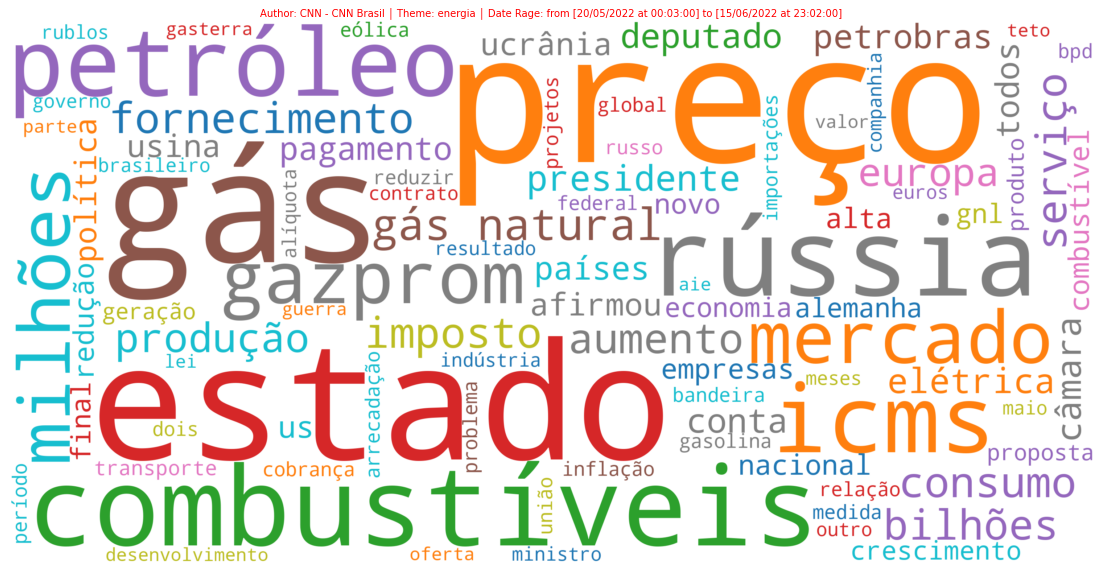

<Figure size 432x288 with 0 Axes>

In [8]:
# Ploting the WordCloud figure
py.figure(figsize=(20,10))
py.title(wordcloud_title, fontsize=10, color="red")
py.imshow(wordcloud, interpolation="bilinear")
py.axis("off")

fig1 = py.gcf()
py.show()
py.draw()
fig1.savefig(search_theme+'.png', dpi=100)


In [9]:
# iterative scatter analysis with wordcloud words

## creating a dataframe with the dictionary generated by the NLP algorithm
df2 = pd.DataFrame.from_dict(wordcloud_text, orient='index') # generating a dataframe from a dictionary
df2 = df2.rename(columns={0:'count'}) 
df2['word'] = df2.index
df2 = df2.reset_index(drop=True)
df2 = df2[['word','count']]

df2.sort_values(by = ['count'],ascending = False,inplace = True, ignore_index = True) # Sort values by descending

## generating a scatterplot from the plotfy library
fig = px.scatter(df2.query('count > 10'),
                y="count",
                size="count",
                color="word",
                hover_name="word",
                log_x=True,
                title = wordcloud_title,
                width=1500, 
                height=750,
                size_max=60)
fig.show()

plt.offline.plot(fig, filename = search_theme+'.html')

'energia.html'